In [1]:
!pip install cvlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046382 sha256=27ddbaf6494672997d1968c8fced5633ea578d8db3e71e03b6afb56110d716de
  Stored in directory: /root/.cache/pip/wheels/96/ad/4c/d80d4bf4143c154ab297e2384915c89aff43d77d1787b9a702
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12080 sha256=46e6691903fcec4f109a129965b4cb598df8f554c3f0c60f181a49fb381fe031
  Stored in directory: /root/.cache/pip/wheels/d7/d9/89/a3f31c76ff6d51dc3b1575628f59afe59e4ceae3f2748cd7ad
Successfully built cvlib progressbar


In [2]:
import os
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
from glob import glob
import numpy as np
import matplotlib
import seaborn as sns
import PIL
PIL.Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import sys
import json
import pandas as pd
import cvlib as cv
from cvlib.object_detection import draw_bbox
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import tensorflow_datasets as tfds

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add, BatchNormalization

In [5]:
def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net_1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net = Add()([net_1_1, net3])

    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)

    net = Add()([net, net3])

    net = MaxPool2D()(net)

    net = Flatten()(net)
    net = Dense(5, activation='softmax')(net)

    model = tf.keras.Model(inputs = inputs, outputs = net, name = 'resnet')

    return model

In [6]:
batch_size = 32
img_height = 80
img_width = 50

In [7]:
dataset_path = '/content/drive/MyDrive/ZB/DL_project_2/temp_data/Training'

In [10]:
train_x = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    color_mode = 'grayscale'
)

Found 84914 files belonging to 5 classes.
Using 67932 files for training.


In [11]:
dataset_path = '/content/drive/MyDrive/ZB/DL_project_2/temp_data/Training'
val_x = tf.keras.utils.image_dataset_from_directory(
    dataset_path,validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size,
    color_mode = 'grayscale'
)

Found 84914 files belonging to 5 classes.
Using 16982 files for validation.


In [12]:
for image_batch, labels_batch in train_x:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 80, 50, 1)
(32,)


In [13]:
def build_resnet2(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2, padding='same')(inputs)
    net = BatchNormalization()(net)  # BatchNormalization 추가
    net =  tf.keras.activations.relu(net)  # 활성화 함수를 직접 적용

    net = MaxPool2D()(net)

    net1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net1 = BatchNormalization()(net1)  # BatchNormalization 추가
    net1 =  tf.keras.activations.relu(net1)  # 활성화 함수를 직접 적용

    net2 = Conv2D(64, kernel_size=3, padding='same')(net1)
    net2 = BatchNormalization()(net2)  # BatchNormalization 추가
    net2 =  tf.keras.activations.relu(net2)  # 활성화 함수를 직접 적용

    net3 = Conv2D(64, kernel_size=1, padding='same')(net2)
    net3 = BatchNormalization()(net3)  # BatchNormalization 추가
    net3 =  tf.keras.activations.relu(net3)  # 활성화 함수를 직접 적용

    net1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net1_1 = BatchNormalization()(net1_1)  # BatchNormalization 추가
    net1_1 =  tf.keras.activations.relu(net1_1)  # 활성화 함수를 직접 적용

    net = Add()([net1_1, net3])

    net1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net1 = BatchNormalization()(net1)  # BatchNormalization 추가
    net1 =  tf.keras.activations.relu(net1)  # 활성화 함수를 직접 적용

    net2 = Conv2D(64, kernel_size=3, padding='same')(net1)
    net2 = BatchNormalization()(net2)  # BatchNormalization 추가
    net2 =  tf.keras.activations.relu(net2)  # 활성화 함수를 직접 적용

    net3 = Conv2D(64, kernel_size=1, padding='same')(net2)
    net3 = BatchNormalization()(net3)  # BatchNormalization 추가
    net3 =  tf.keras.activations.relu(net3)  # 활성화 함수를 직접 적용

    net = Add()([net, net3])

    net = MaxPool2D()(net)

    net = Flatten()(net)
    net = Dense(5, activation='softmax')(net)

    model = tf.keras.Model(inputs=inputs, outputs=net)

    return model

In [14]:
model3 = build_resnet2((80,50,1))

In [15]:
learning_rate = 0.005
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.sparse_categorical_crossentropy

model3.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [16]:
hist3 = model3.fit(
  train_x,
  validation_data=val_x,
  epochs=5)

Epoch 1/5
2123/2123 [==============================] - 10118s 5s/step - loss: 1.1690 - accuracy: 0.6095 - val_loss: 1.4913 - val_accuracy: 0.4562
Epoch 2/5
2123/2123 [==============================] - 149s 70ms/step - loss: 0.6090 - accuracy: 0.7471 - val_loss: 0.6109 - val_accuracy: 0.7366
Epoch 3/5
2123/2123 [==============================] - 148s 70ms/step - loss: 0.5081 - accuracy: 0.7848 - val_loss: 0.5813 - val_accuracy: 0.7643
Epoch 4/5
2123/2123 [==============================] - 144s 68ms/step - loss: 0.4587 - accuracy: 0.8033 - val_loss: 0.6055 - val_accuracy: 0.7339
Epoch 5/5
2123/2123 [==============================] - 144s 67ms/step - loss: 0.4187 - accuracy: 0.8184 - val_loss: 0.5127 - val_accuracy: 0.7788


In [17]:
hist3.history

{'loss': [1.1690332889556885,
  0.6090250015258789,
  0.5081121921539307,
  0.45867806673049927,
  0.4187021255493164],
 'accuracy': [0.6095359921455383,
  0.7471000552177429,
  0.7848142385482788,
  0.8032591342926025,
  0.8184213638305664],
 'val_loss': [1.4913090467453003,
  0.6108841300010681,
  0.5813497304916382,
  0.6055433750152588,
  0.5127192735671997],
 'val_accuracy': [0.45624780654907227,
  0.7366034388542175,
  0.7643387317657471,
  0.7338947057723999,
  0.7788246273994446]}

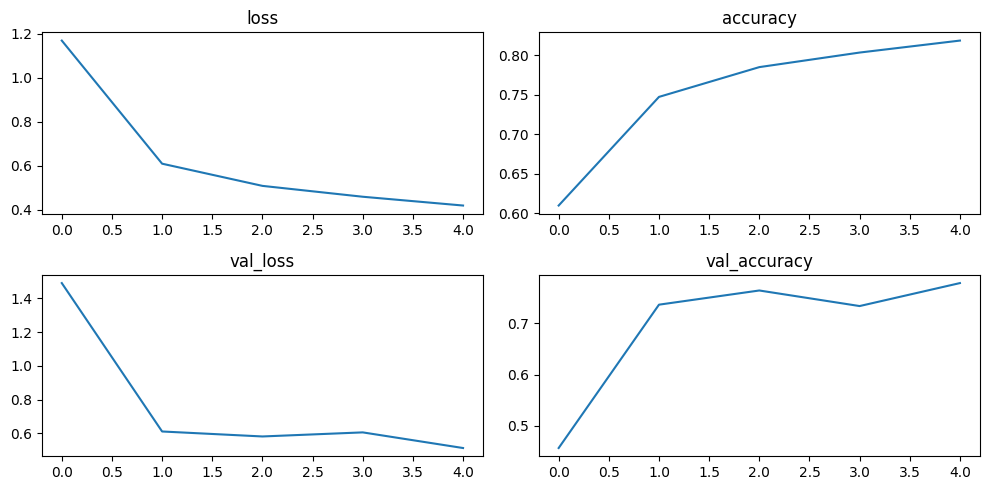

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(hist3.history['loss'])
plt.title('loss')
plt.subplot(222)
plt.plot(hist3.history['accuracy'])
plt.title('accuracy')
plt.subplot(223)
plt.plot(hist3.history['val_loss'])
plt.title('val_loss')
plt.subplot(224)
plt.plot(hist3.history['val_accuracy'])
plt.title('val_accuracy')

plt.tight_layout()
plt.show()

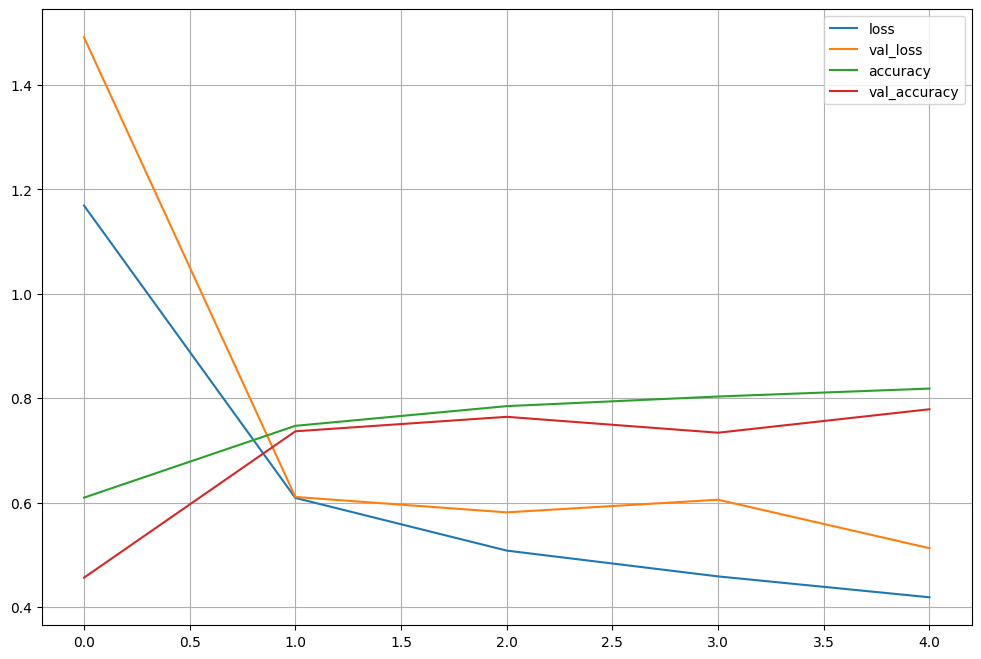

In [19]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist3.history[each], label=each)

plt.legend()
plt.grid()
plt.show()

In [20]:
model3.save("./Resnet_with_batch_normalization_in_every_layer.h5")

In [24]:
model3.save('Resnet_with_batch_normalization_in_every_layer.h5')

In [25]:
model3.save('model3.h5')

In [23]:
import os
os.chdir('/content/drive/MyDrive/ZB/DL_project_2')

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix


In [29]:
y_pred = model3.predict(val_x)

531/531 [==============================] - 29s 53ms/step


In [32]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred[:5]

array([2, 4, 1, 2, 0])

In [ ]:
y_true = []
y_pred = []
i = 0
for x,y in val_x:
    i += 1
    y_true.extend(y)
    temp = model3.predict(x)
    temp = [np.argmax(tmp) for tmp in temp]
    y_pred.extend(temp)


In [66]:
y_true = np.array(y_true)
y_pred = np.array(y_pred)
print(y_true[:5])
print(y_pred[:5])
print(len(y_true))
print(len(y_pred))

[1 2 4 3 0]
[1 2 4 3 1]
16982
16982


In [69]:
confusion_matrix(y_true, y_pred, normalize='true')

array([[0.8786528 , 0.04754829, 0.03070827, 0.02971768, 0.01337296],
       [0.00198118, 0.78157504, 0.17161961, 0.01448737, 0.0303368 ],
       [0.00366714, 0.32299013, 0.62595205, 0.00423131, 0.04315938],
       [0.0054315 , 0.09173205, 0.0054315 , 0.89378395, 0.003621  ],
       [0.00356083, 0.09020772, 0.04985163, 0.00178042, 0.85459941]])

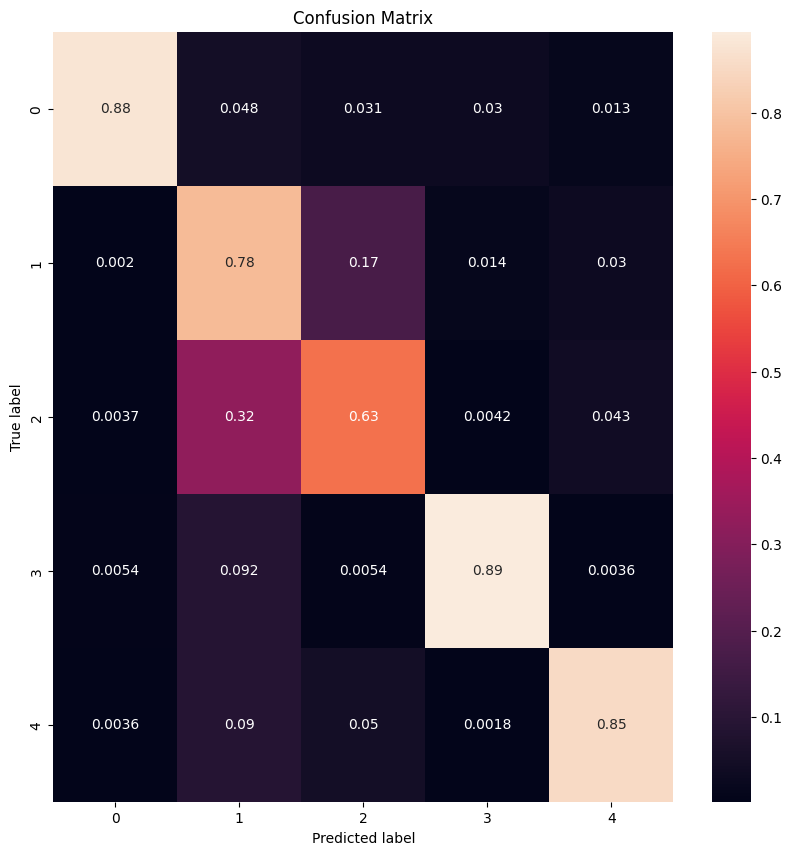

In [71]:
cm = confusion_matrix(y_true, y_pred, normalize='true')

import seaborn as sns
fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(cm, annot=True)
ax.set(title = 'Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
fig.savefig("confusion_matrix_for_resnet_with_batch_normalization")

In [79]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
i = 0
for x,y in val_x:
    X = np.array(x)
    Y = np.array(y)
    for m, n in zip(X, Y):
        i += 1
        plt.imshow(m)
        plt.title(str(n))
        plt.xticks([])
        plt.yticks([])
        plt.show()
        if i > 5:
            break

Output hidden; open in https://colab.research.google.com to view.

In [81]:
print(type(cm))

<class 'numpy.ndarray'>


In [82]:
df = pd.DataFrame(cm)
df.head()

,0,1,2,3,4
0,0.878653,0.047548,0.030708,0.029718,0.013373
1,0.001981,0.781575,0.171620,0.014487,0.030337
2,0.003667,0.322990,0.625952,0.004231,0.043159
3,0.005432,0.091732,0.005432,0.893784,0.003621
4,0.003561,0.090208,0.049852,0.001780,0.854599


In [87]:
df.index = ['call', 'normal','sleep','smoke','yawn']
df.columns = ['call', 'normal','sleep','smoke','yawn']

In [88]:
df.head()

,call,normal,sleep,smoke,yawn
call,0.878653,0.047548,0.030708,0.029718,0.013373
normal,0.001981,0.781575,0.171620,0.014487,0.030337
sleep,0.003667,0.322990,0.625952,0.004231,0.043159
smoke,0.005432,0.091732,0.005432,0.893784,0.003621
yawn,0.003561,0.090208,0.049852,0.001780,0.854599


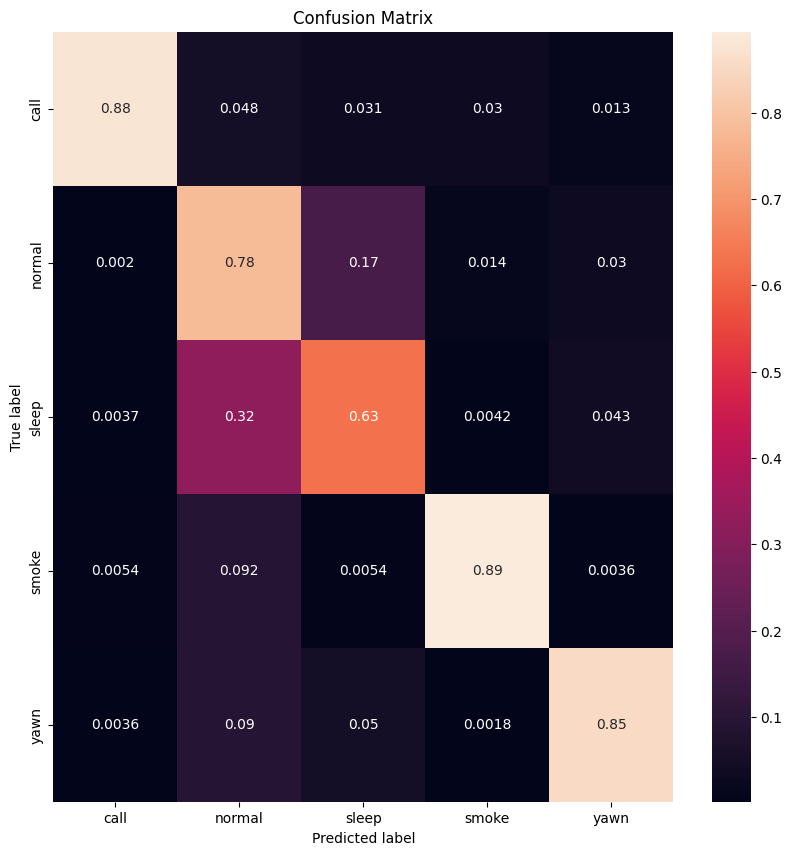

In [89]:
fig = plt.figure(figsize = (10,10))
ax = sns.heatmap(df, annot=True)
ax.set(title = 'Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
fig.savefig("confusion_matrix_for_resnet_with_batch_normalization")